<a href="https://colab.research.google.com/github/nirjalalala/learn_ml/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading dataset

In [21]:
# First and fore most dataset zip download garney then extract then upload in drive then
#navigate to drive/MyDrive/NetflixOriginal.csv   then copy path

#import section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

#paste the copied path here yeta we used encoding='latin1' to avoid UnicodeDecodeError
df = pd.read_csv("/content/drive/MyDrive/NetflixOriginals.csv", encoding='latin1')

#aba check if the dataset is loaded sucessfully by printing the first 5 rows
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


##Data Exploration

In [3]:
#Data Profiling
# data kasto xa ani columns haru ko data-type bujhne
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB
None


In [4]:
#hamro sabai numeric columns ko statistical measures haru
#find out garne (descriptive statistics)

print(df.describe())

          Runtime  IMDB Score
count  584.000000  584.000000
mean    93.577055    6.271747
std     27.761683    0.979256
min      4.000000    2.500000
25%     86.000000    5.700000
50%     97.000000    6.350000
75%    108.000000    7.000000
max    209.000000    9.000000


Movie length 4 minute dekhi 209 minute samma ko raixa.<br>
Rating 2.5 dekhi 9 samma .

In [5]:
print(df.value_counts())

Title                                                   Genre                  Premiere           Runtime  IMDB Score  Language       
Òlòt?ré                                                 Crime drama            October 2, 2020    106      5.5         English            1
#REALITYHIGH                                            Comedy                 September 8, 2017  99       5.2         English            1
13th                                                    Documentary            October 7, 2016    100      8.2         English            1
13th: A Conversation with Oprah Winfrey & Ava DuVernay  Aftershow / Interview  January 26, 2017   36       7.1         English            1
15 August                                               Comedy-drama           March 29, 2019     124      5.8         Marathi            1
                                                                                                                                         ..
A California Christmas   

In [6]:
# Check total missing values per column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64


Currently, hamro dataset ma euta pani null values xaina , which is good.

In [ ]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


Duplicate rows vayeko vaye hamile drop garnu parthyo but ahile hamro data consistent nai xa.

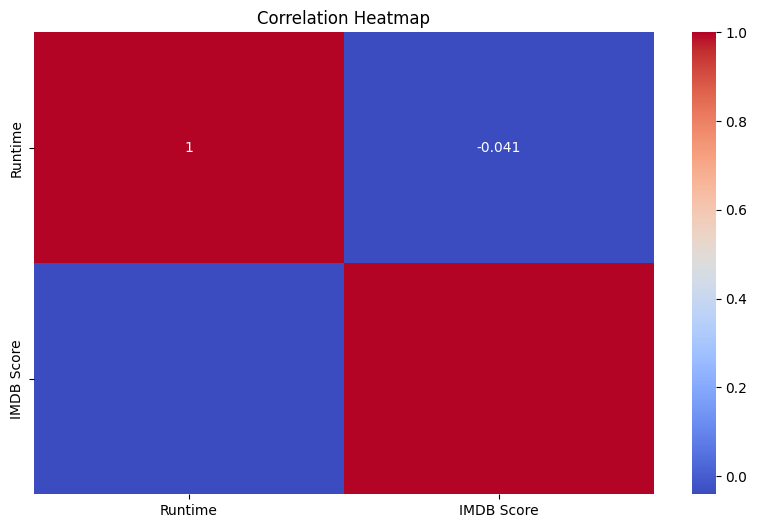

In [ ]:
# Correlation matrix before any changes
# to show the difference between before and after EDA
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Runtime (Movie length) ra imdb score (rating) ko ekdamai thorai correlation xa, negative ma.
So length badda score ghatna sakxa.

##Data Cleaning

In [7]:
# In DSA we do not change the main dsa but make a copy of the main dataset then edit the copy
df_copy = df.copy()

In [8]:
# Check data types of each column
print(df.dtypes)


Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object


In [9]:
# Since most object ma xan so lets catogorize them

#Converting string columns with repeated values to category
# by doing this it Saves memory and speeds up processing,
# especially during groupby or filtering.

df_copy['Genre'] = df_copy['Genre'].astype('category')
df_copy['Language'] = df_copy['Language'].astype('category')

# Converting Premiere to datetime since This is currently object, but it's a date
# Enables us to use .dt accessor for operations
# like extracting year, month, filtering by date, etc.
df_copy['Premiere'] = pd.to_datetime(df_copy['Premiere'], errors='coerce')

# Numerical columns lai xoddinxam since they are already correct
#now lets recheck our datatypes
print(df_copy.dtypes)


Title                 object
Genre               category
Premiere      datetime64[ns]
Runtime                int64
IMDB Score           float64
Language            category
dtype: object


In [ ]:
df_copy['Premiere'].isnull().sum()

3

3 cells couldn't be converted into datetime. We can drop them.

In [ ]:
df_copy = df_copy[  df_copy['Premiere'].notnull()]

In [ ]:
df_copy['Premiere'].isnull().sum()

0

Now, there are no missing cells in our entire dataset.

In [ ]:
df_copy['Title'].nunique(), df_copy.shape[0]

(584, 584)

here since every title is unique with no repetition we should keep title as objects

##Data Visualization

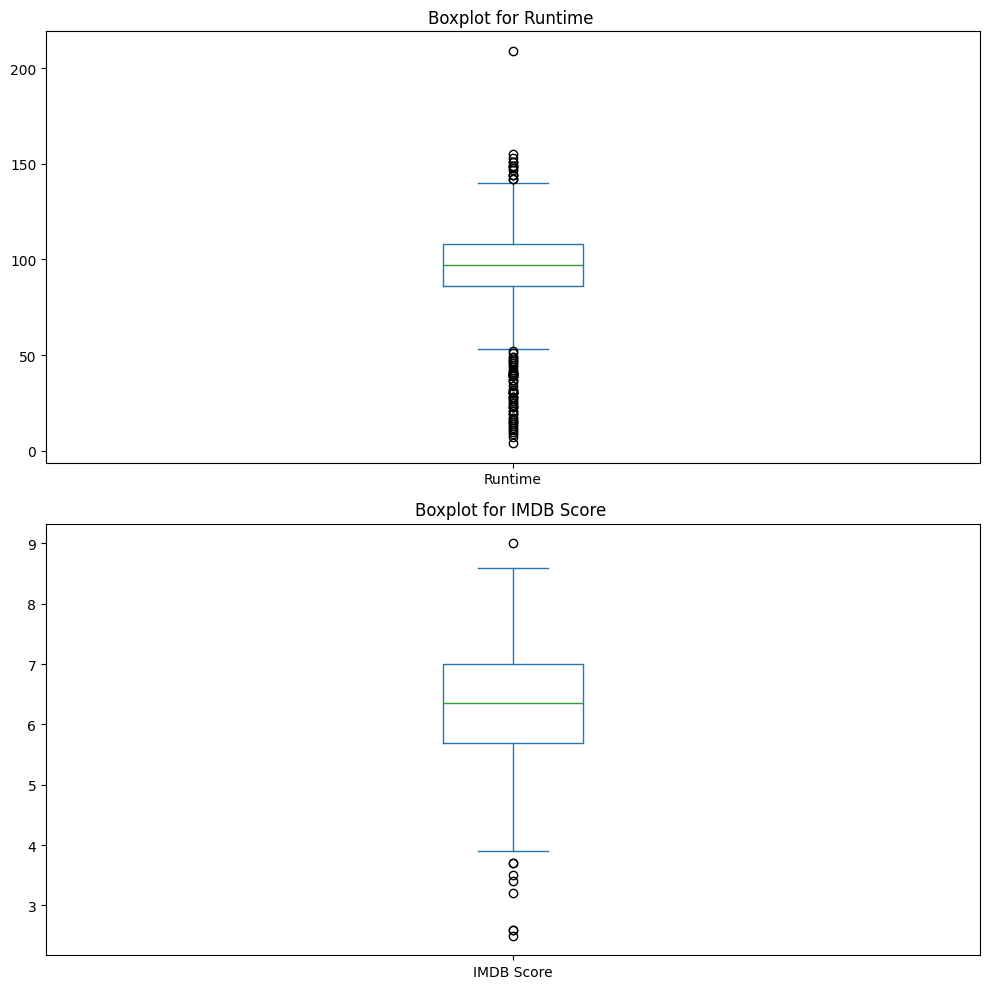

In [10]:
# selects all columns in df_copy that are numeric, and stores them in a new DataFrame called numeric_cols.
numeric_cols = df_copy.select_dtypes(include='number')

# This line creates separate boxplots for each numeric column (e.g., Runtime, IMDB Score)
# sabai numeric columns ko lagi individual boxplots banaucha — eauta eauta plot eauta column ko lagi
# 'subplots=True' le garda each plot afnai subplot ma aaucha
# 'layout=(len(numeric_cols.columns), 1)' le vertical layout banaune (one plot per row)
# 'figsize=(10, 5 * len(numeric_cols.columns))' le graph size set garcha depending on number of columns
# 'sharex=False' le x-axis haru lai independent banaune (not shared)
# 'color=blue' le boxplot ko line color blue banaune
# 'patch_artist=True' le fill color allow garcha box ma
# 'title=[...]' le har eauta subplot ko title set garcha (e.g., "Boxplot for Runtime")

numeric_cols.plot(kind='box', subplots=True, layout=(len(numeric_cols.columns), 1),
                  figsize=(10, 5 * len(numeric_cols.columns)), sharex=False,
                   title=[f'Boxplot for {col} ' for col in numeric_cols.columns])

plt.tight_layout()
plt.show()

Runtime column ma hamro outliers haru ekdamai dherai xa. So hami teslai euta range ma lyauxau.

###Outlier handling

In [11]:
# Calculate IQR for a specific column (e.g., 'Runtime')
Q1 = df_copy['Runtime'].quantile(0.25)
Q3 = df_copy['Runtime'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# aba bound vitra value xaina vane tyo row nai drop hunxa
df_copy = df_copy[(df_copy["Runtime"]<=upper_bound) & (df_copy["Runtime"]>=lower_bound) ]

Doing same thing for imdb score.

In [12]:
# Calculate IQR for a specific column (e.g., 'IMDB Score')
Q1 = df_copy['IMDB Score'].quantile(0.25)
Q3 = df_copy['IMDB Score'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#similar as above
df_copy = df_copy[(df_copy["IMDB Score"]<=upper_bound) & (df_copy["IMDB Score"]>=lower_bound) ]

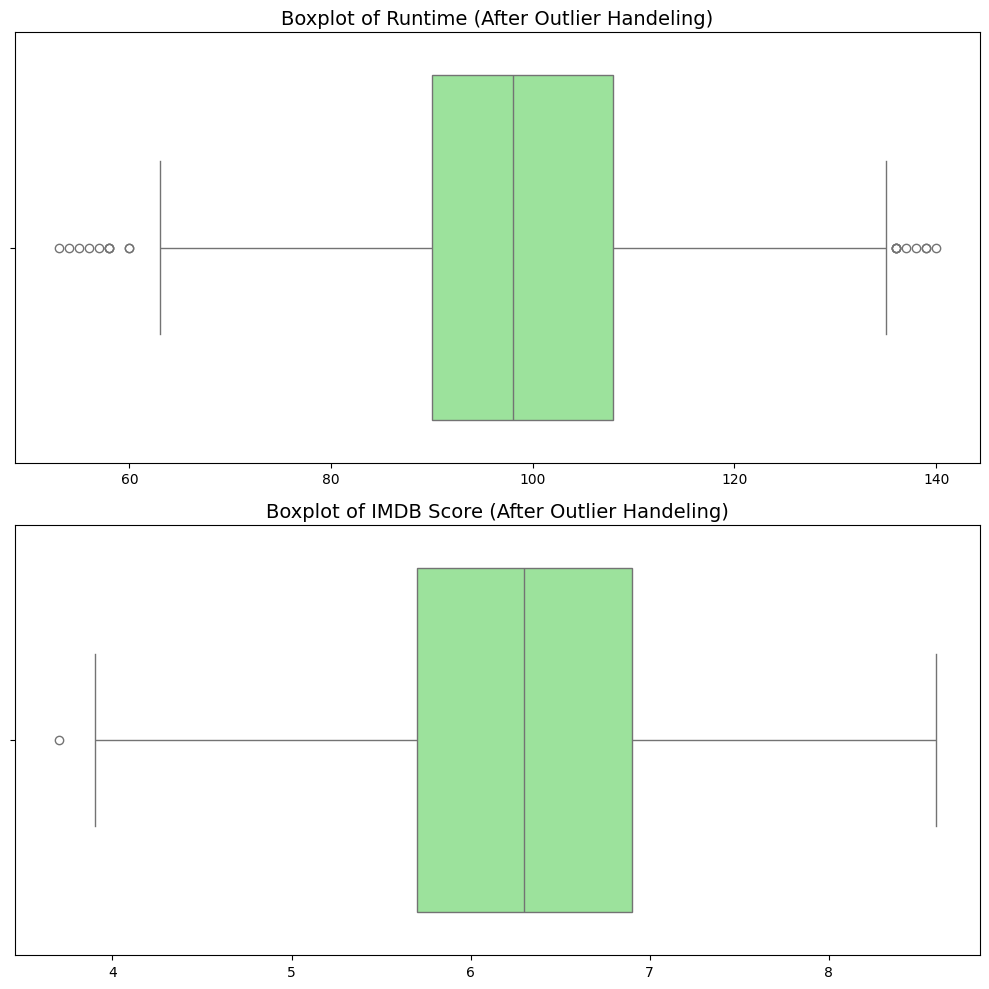

In [13]:
# yo code ma Outlier hataisakepachi data ko range ani distribution clearly dekhna sajilo huncha

# Select numeric columns only
numeric_cols = df_copy.select_dtypes(include='number')

# Set figure size based on number of numeric columns
plt.figure(figsize=(10, 5 * len(numeric_cols.columns)))

# Plot boxplot for each numeric column
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(len(numeric_cols.columns), 1, i)  # One plot per row
    sns.boxplot(data=df_copy, x=col, color='lightgreen')  # Boxplot with light green color
    plt.title(f'Boxplot of {col} (After Outlier Handeling)', fontsize=14)
    plt.xlabel("")  # Remove x-axis label for clean look

plt.tight_layout()
plt.show()

Paile ko boxplot ra ahile ko boxplot herne ho vane outlier hateko dekhinxa.

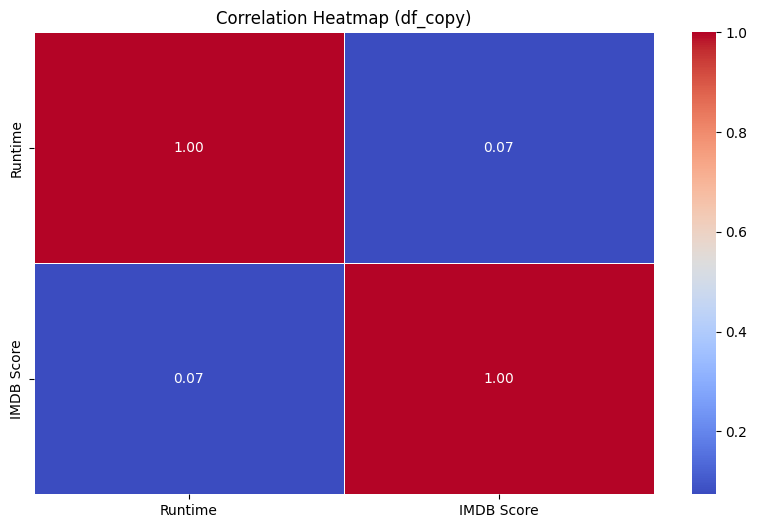

In [14]:
# This section helps understand relationships between numeric features like Runtime and IMDB Score
# Heatmap dekhaune correlation (kati related chan features)
# Regression plot and scatterplot le visually dekhaucha kasto sambandha cha between 2 variables

# Correlation Matrix for numeric columns
correlation_matrix_copy = df_copy.corr(numeric_only=True)

# Heatmap to visualize correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_copy, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (df_copy)')
plt.show()


From the heatmap image, we can understand the following:

- Runtime and IMDB Score have a very weak positive correlation.

- This means that as Runtime increases, IMDB Score does not significantly increase or decrease
  there's almost no linear relationship between them.

- Each variable has a perfect correlation with itself (1.00), which is normal.

Agi banako heatmap ra yo farak vayo because we have dropped many rows during outlier handling.

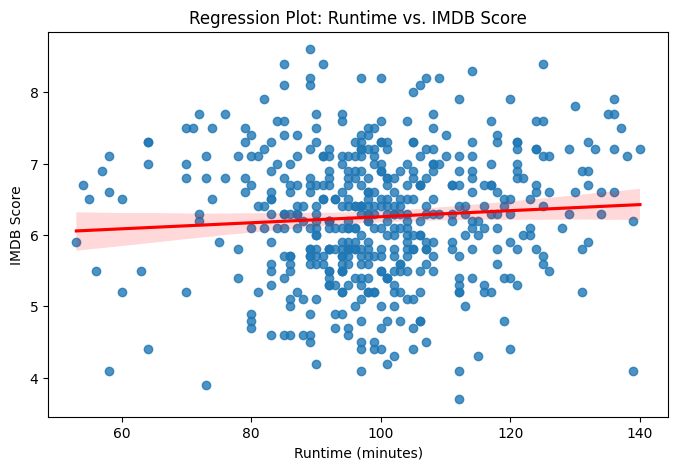

In [15]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Runtime', y='IMDB Score', data=df_copy, line_kws={"color": "red"})
plt.title('Regression Plot: Runtime vs. IMDB Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Score')
plt.show()



From the regression plot (Runtime vs. IMDB Score), we can understand the following:

- The red line represents the best-fit line showing the trend between Runtime and IMDB Score.

- The line is slightly sloped upwards, indicating a very weak positive relationship
   as Runtime increases, IMDB Score may slightly increase, but not in a strong or clear way.

- The scatter of points is widely spread, showing high variability and no strong pattern,
   which matches the weak correlation (0.07) seen in the heatmap.


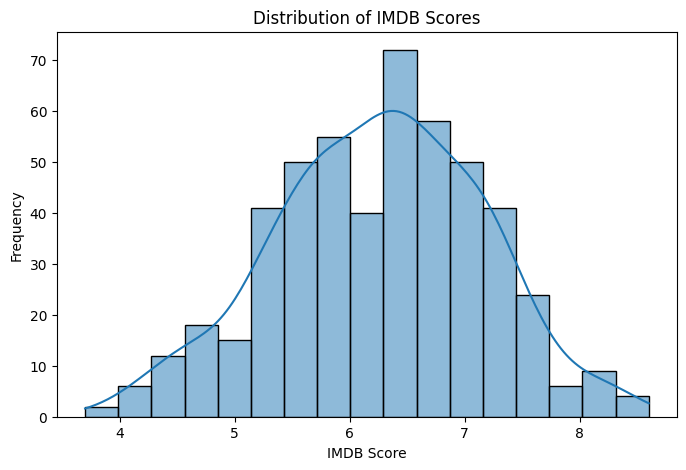

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df_copy['IMDB Score'], kde=True)
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.show()

In [17]:
#skewness of imdb score

skewness = df_copy['IMDB Score'].skew()
print(f"Skewness of IMDB Score: {skewness}")

Skewness of IMDB Score: -0.13010062843731934


Average ma chai 5 dekhi 7.5 aaudo raixa. Average vanda dherai thorai aaune pani xan. The distribution is left-skewed.

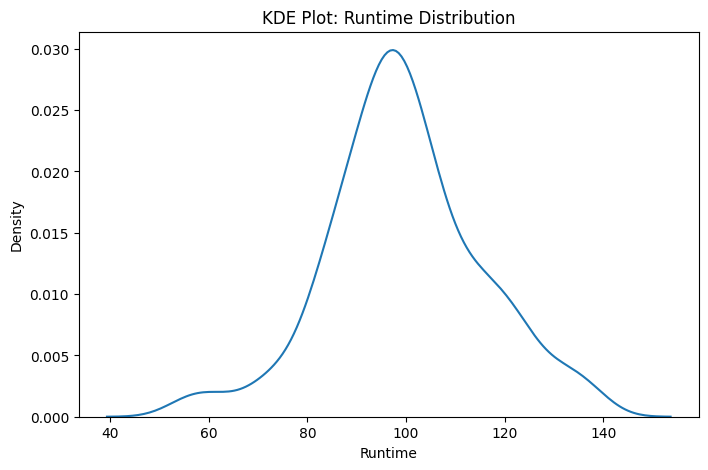

In [19]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df_copy['Runtime'])
plt.title('KDE Plot: Runtime Distribution')
plt.xlabel('Runtime')
plt.ylabel('Density')
plt.show()


In [20]:
#skewness of runtime

skewness = df_copy['Runtime'].skew()
print(f"Skewness of Runtime: {skewness}")

Skewness of Runtime: -0.0008327078298255541


Nearly normal distribution xa vanne bujhinxa.

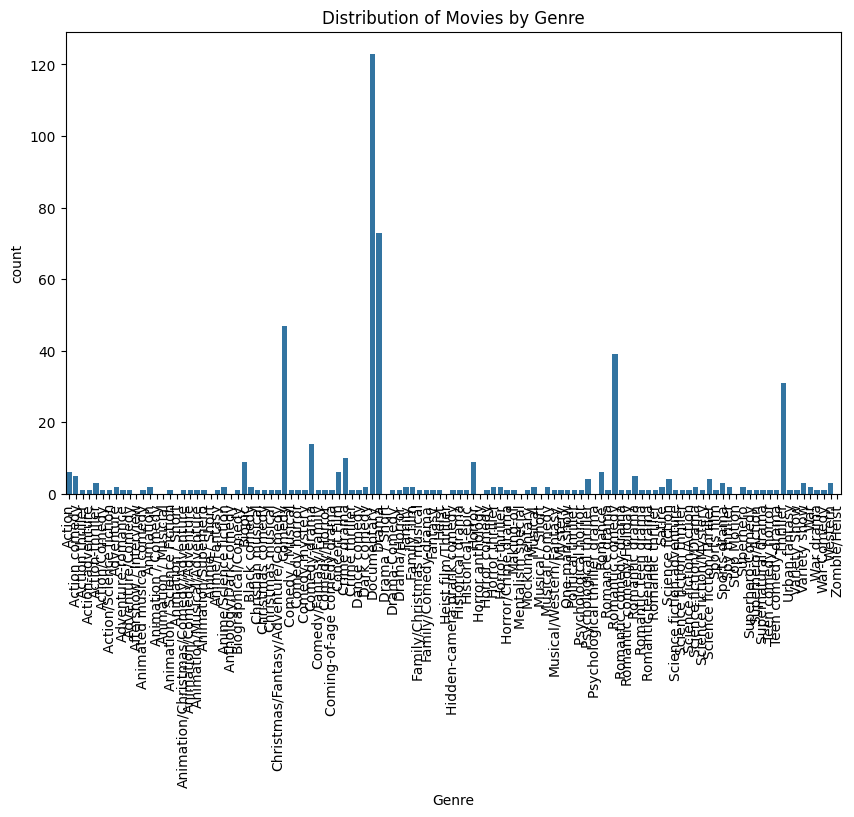

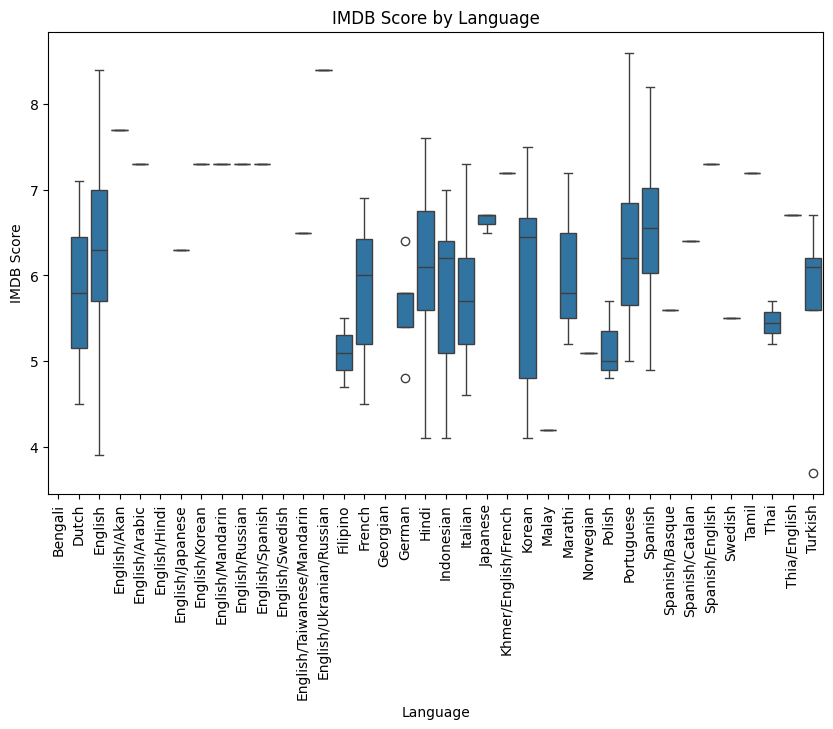

In [22]:
# Plotting count of each category


plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=df_copy)
plt.xticks(rotation=90) # Rotate labels if many categories
plt.title('Distribution of Movies by Genre')
plt.show()

# Plotting a numeric variable across categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Language', y='IMDB Score', data=df_copy)
plt.xticks(rotation=90)
plt.title('IMDB Score by Language')
plt.show()

Kei pani bujhiyena. Let's try another approach.

##Feature Engineering

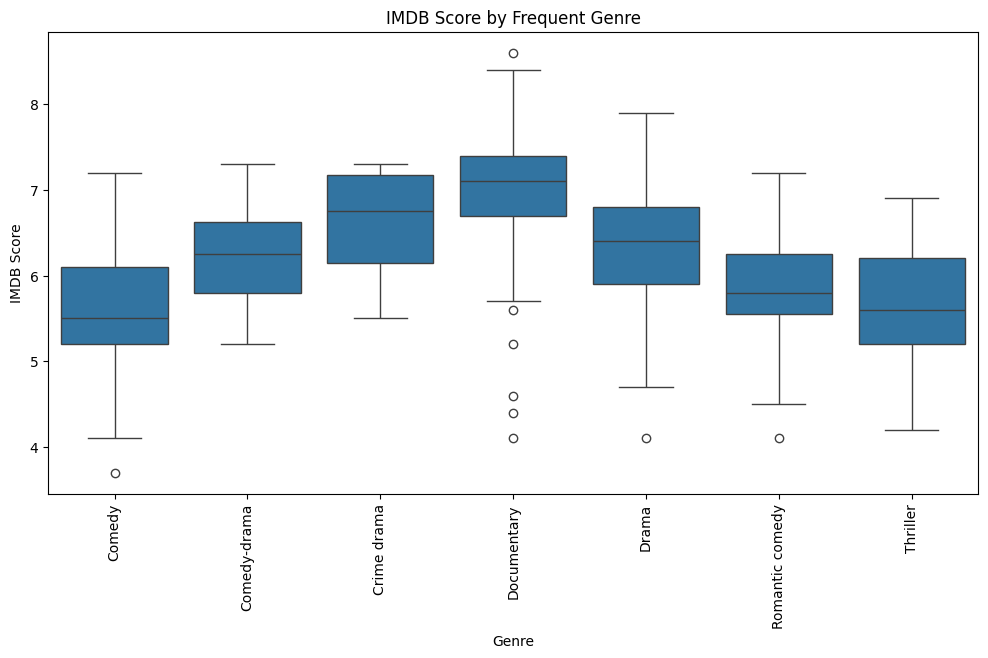

In [48]:
# Get the value counts for the 'Genre' column
genre_counts = df_copy['Genre'].value_counts()

threshold = 10 # Only include genre with at least 10 movies

# Get the list of genre that meet the threshold
frequent_genre = genre_counts[genre_counts >= threshold].index.tolist()

# Filter the DataFrame to include ONLY movies in these frequent genres
df_frequent_genre = df_copy[df_copy['Genre'].isin(frequent_genre)].copy()

# CAtegory type hatako.
df_frequent_genre['Genre'] = df_frequent_genre['Genre'].cat.remove_unused_categories()

# Now plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='IMDB Score', data=df_frequent_genre)
plt.xticks(rotation=90)
plt.title('IMDB Score by Frequent Genre')
plt.show()


Frequent genre haru yini haru hun. DOcumentary, thriller, drama ra rom-com badi baneka xan. Yesma pani, documentary ko rating chai highest xa. Except some outliers.

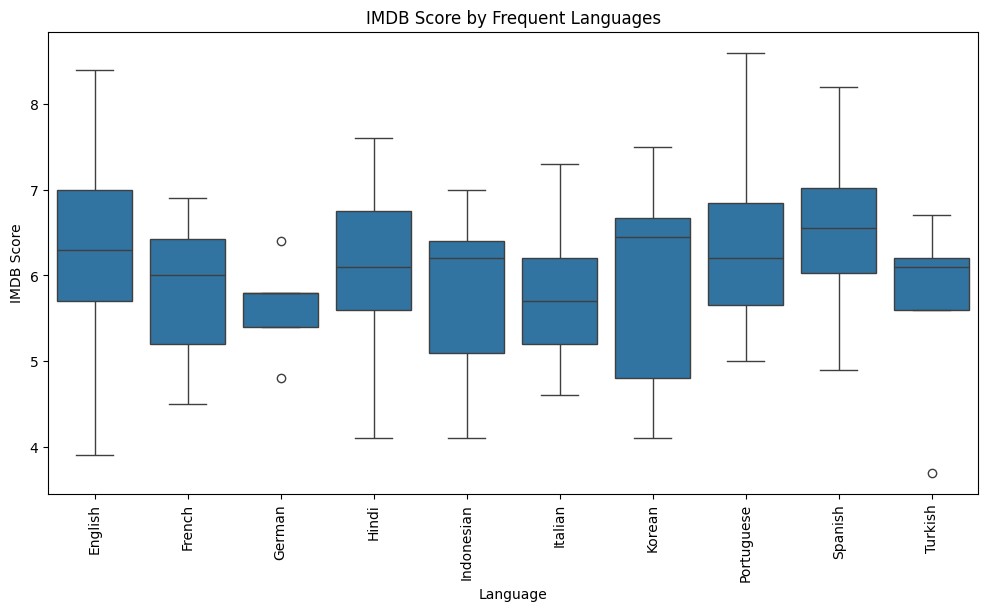

In [49]:
# Get the value counts for the 'Language' column
language_counts = df_copy['Language'].value_counts()

threshold = 5 # Only include languages with at least 10 movies

# Get the list of languages that meet the threshold
frequent_languages = language_counts[language_counts >= threshold].index.tolist()

# Filter the DataFrame to include only movies in these frequent languages
df_frequent_languages = df_copy[df_copy['Language'].isin(frequent_languages)].copy()

df_frequent_languages['Language'] = df_frequent_languages['Language'].cat.remove_unused_categories()

# Now plot the boxplot using the filtered DataFrame
plt.figure(figsize=(12, 6)) # Adjust figure size as needed
sns.boxplot(x='Language', y='IMDB Score', data=df_frequent_languages)
plt.xticks(rotation=90)
plt.title('IMDB Score by Frequent Languages')
plt.show()

English ra Portugese ko dherai raixa max_rating.

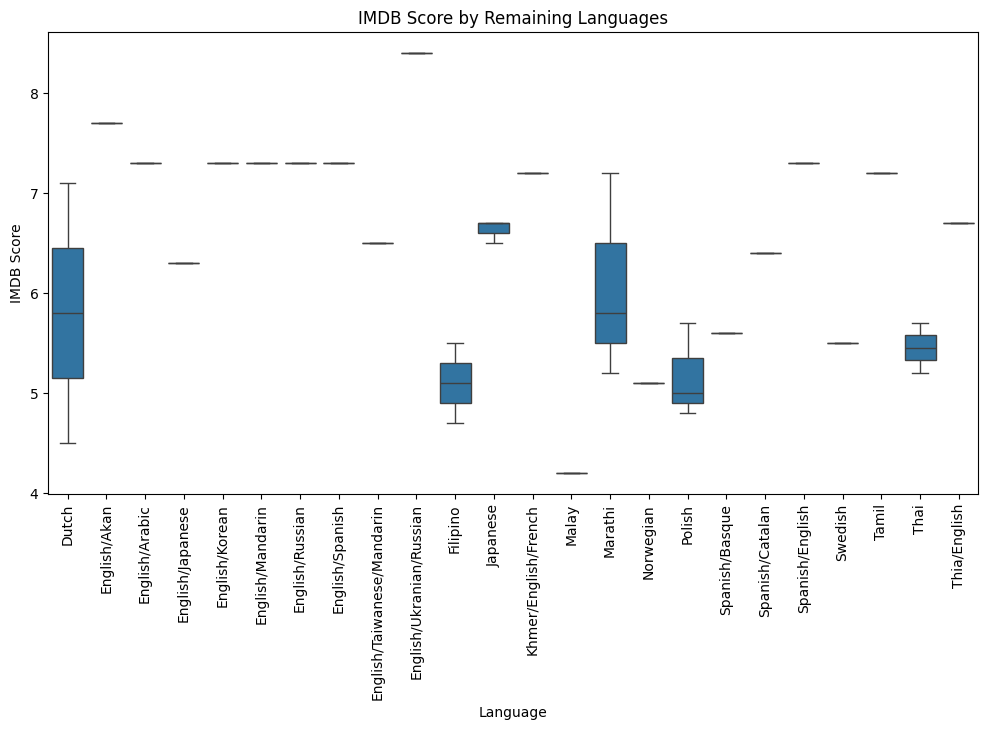

In [50]:
# Filter the DataFrame to include only movies in these frequent languages
other_languages = df_copy[~df_copy['Language'].isin(frequent_languages)].copy()
other_languages['Language'] = other_languages['Language'].cat.remove_unused_categories()

# Now plot the boxplot using the filtered DataFrame
plt.figure(figsize=(12, 6)) # Adjust figure size as needed
sns.boxplot(x='Language', y='IMDB Score', data=other_languages)
plt.xticks(rotation=90)
plt.title('IMDB Score by Remaining Languages')
plt.show()

Less frequent languages ko herda, Malay, Marathi,Tamil ko ekdam kam rating xa.
Dherai jso language category ma euta euta matra movie relese vayeko xa.<br>
Praye dubbed movies (multiple languages) ma vako haruko testo extreme rating xaina. AVerage mai xa.

In [51]:
# Create a new feature 'Runtime_Category' based on runtime duration
def categorize_runtime(runtime):
    if runtime < 90:
        return 'Short'
    elif runtime <= 120:
        return 'Medium'
    else:
        return 'Long'

df_copy['Runtime_Category'] = df_copy['Runtime'].apply(categorize_runtime)

# Display the updated DataFrame
print(df_copy.head())


                   Title                    Genre   Premiere  Runtime  \
6      Leyla Everlasting                   Comedy 2020-12-04      112   
8                Paradox  Musical/Western/Fantasy 2018-03-23       73   
9     Sardar Ka Grandson                   Comedy 2021-05-18      139   
10  Searching for Sheela              Documentary 2021-04-22       58   
11              The Call                    Drama 2020-11-27      112   

    IMDB Score Language Runtime_Category  
6          3.7  Turkish           Medium  
8          3.9  English            Short  
9          4.1    Hindi             Long  
10         4.1  English            Short  
11         4.1   Korean           Medium  


1. It Makes a Continuous Feature More Interpretable
Runtime is a continuous numeric feature, which can be hard to interpret directly.

By categorizing it into groups like Short, Medium, and Long, we can better understand patterns and differences in how runtime relates to other variables (like IMDB Score).

Humans are naturally better at reasoning about groups/categories than raw numbers.

2. It Helps Identify Trends or Biases
We can now check if longer movies tend to have better or worse IMDB scores compared to short or medium ones.

This insight is valuable for producers or analysts who want to know:
"Does movie length impact audience ratings?"

3. Useful for Visualizations & Modeling
Categorical features are easier to compare visually using:

• Count plots (for distribution)
• Box plots (for comparisons of distributions across categories)

Also, if used in modeling later, categorical features can be encoded and often improve model interpretability.

 4. More Meaningful than Arbitrary Binning
We chose Runtime_Category over something like binning IMDB scores or release year because:

• Runtime is directly measurable and likely to influence viewer perception.
• Grouping IMDB scores or Premiere years might not have a clear, interpretable logic
  (e.g., what's the difference between a 6.3 and 6.5 movie in categories?).

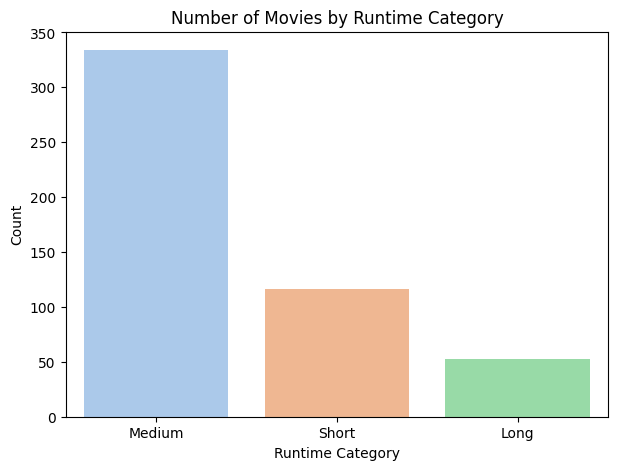

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Runtime_Category', data=df_copy, palette='pastel')
plt.title('Number of Movies by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Count')
plt.show()


90 min - 120 minutes ko movies dherai xan.

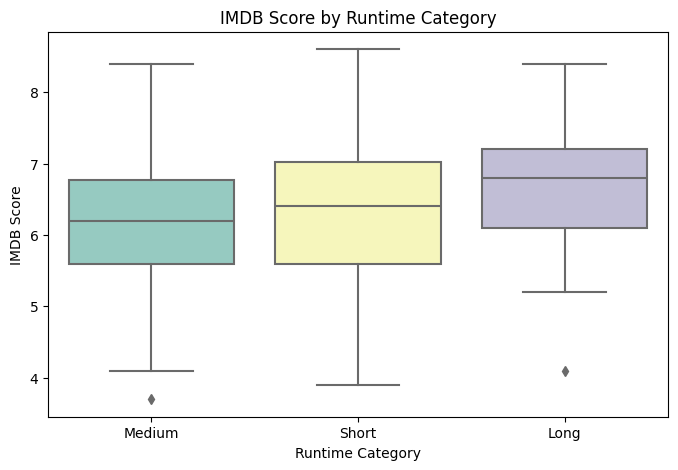

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Runtime_Category', y='IMDB Score', data=df_copy, palette='Set3')
plt.title('IMDB Score by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('IMDB Score')
plt.show()


Longer runtime vako movies ko rating slightly better xa.

In [63]:
# Extract the year from the 'Premiere' column and create a new column 'Release Year'
df_copy['Release Year'] = df_copy['Premiere'].dt.year

# Extract the month from the 'Premiere' column and create a new column 'Release Month'
df_copy['Release Month'] = df_copy['Premiere'].dt.month

# Extract the day of the week (e.g., Monday, Tuesday)
df_copy['Release DayofWeek'] = df_copy['Premiere'].dt.day_name()

# Display the DataFrame with the new datetime features
print(df_copy[['Premiere', 'Release Year', 'Release Month', 'Release DayofWeek']].head())



     Premiere  Release Year  Release Month Release DayofWeek
6  2020-12-04        2020.0           12.0            Friday
8  2018-03-23        2018.0            3.0            Friday
9  2021-05-18        2021.0            5.0           Tuesday
10 2021-04-22        2021.0            4.0          Thursday
11 2020-11-27        2020.0           11.0            Friday


In [59]:
# Filter movies released after a specific date (e.g., after Jan 1, 2020)
movies_after_2020 = df_copy[df_copy['Premiere'] > '2020-01-01']
print("\nMovies premiered after 2020-01-01:")
print(movies_after_2020.head())

number = movies_after_2020['Title'].count()
print(f'\n{number} movies are released after 2020.')



Movies premiered after 2020-01-01:
                   Title            Genre   Premiere  Runtime  IMDB Score  \
6      Leyla Everlasting           Comedy 2020-12-04      112         3.7   
9     Sardar Ka Grandson           Comedy 2021-05-18      139         4.1   
10  Searching for Sheela      Documentary 2021-04-22       58         4.1   
11              The Call            Drama 2020-11-27      112         4.1   
12               Whipped  Romantic comedy 2020-09-18       97         4.1   

      Language Runtime_Category  Release Year  Release Month Release DayofWeek  
6      Turkish           Medium        2020.0           12.0            Friday  
9        Hindi             Long        2021.0            5.0           Tuesday  
10     English            Short        2021.0            4.0          Thursday  
11      Korean           Medium        2020.0           11.0            Friday  
12  Indonesian           Medium        2020.0            9.0            Friday  

222 movies are

In [61]:

# Group by Release Year and count the number of movies released each year
movies_per_year = df_copy.groupby('Release Year').size().reset_index(name='Count')
print("\nNumber of movies released per year:")
print(movies_per_year)

# Group by Release month and count the number of movies released each month
movies_per_month = df_copy.groupby('Release Month').size().reset_index(name='Count')
print("\nNumber of movies released per month:")
print(movies_per_month)

# Group by Release Day and count the number of movies released each day
movies_per_day = df_copy.groupby('Release DayofWeek').size().reset_index(name='Count')
print("\nNumber of movies released per day:")
print(movies_per_day)



Number of movies released per year:
   Release Year  Count
0        2014.0      1
1        2015.0      9
2        2016.0     27
3        2017.0     59
4        2018.0     86
5        2019.0     96
6        2020.0    156
7        2021.0     66

Number of movies released per month:
    Release Month  Count
0             1.0     32
1             2.0     37
2             3.0     46
3             4.0     56
4             5.0     47
5             6.0     30
6             7.0     29
7             8.0     31
8             9.0     42
9            10.0     63
10           11.0     46
11           12.0     41

Number of movies released per day:
  Release DayofWeek  Count
0            Friday    344
1            Monday     11
2          Saturday      4
3            Sunday      6
4          Thursday     48
5           Tuesday     19
6         Wednesday     68


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


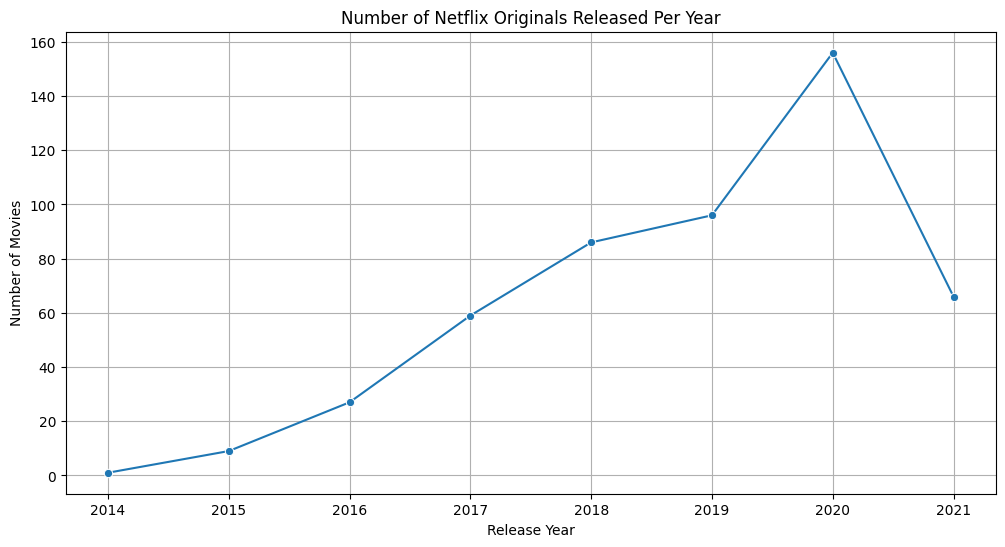

In [ ]:
# Visualize the number of movies released per year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release Year', y='Count', data=movies_per_year, marker='o')
plt.title('Number of Netflix Originals Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

2020 samma movie haru release hune trend chai yearly increase vairathyo, but 2021 ma aayera sharp decline vayo.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


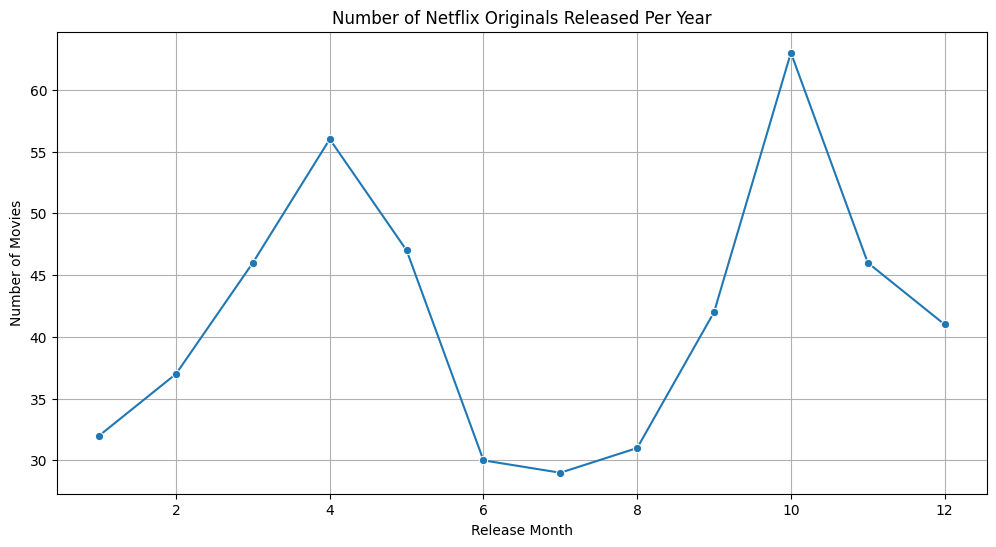

In [ ]:
# Visualize the number of movies released per month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release Month', y='Count', data=movies_per_month, marker='o')
plt.title('Number of Netflix Originals Released Per Year')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

jan, june, april, may ma thorai movies release vako xa.<br>
Sabai vanda dherai chai October ma ra April ma peak vako xa.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


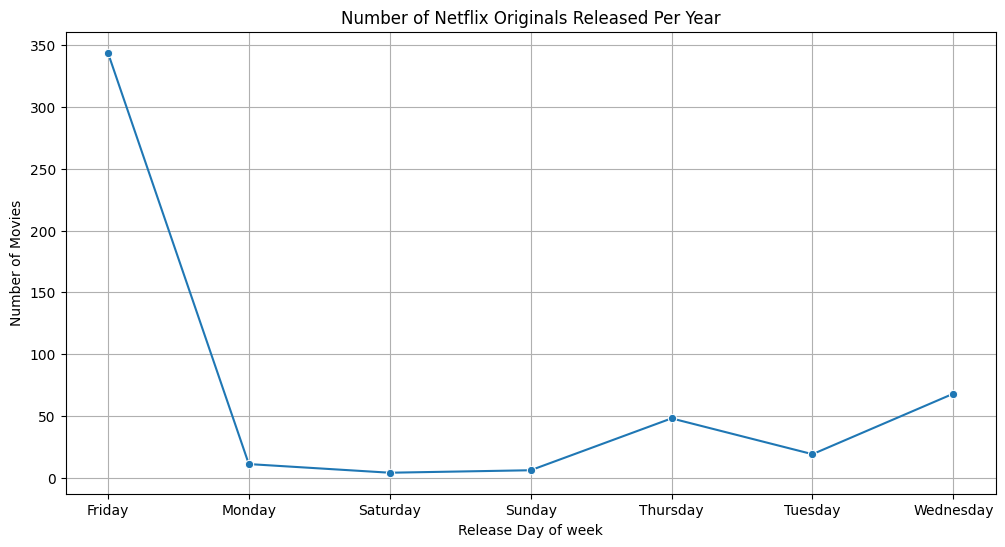

In [ ]:
# Visualize the number of movies released per month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release DayofWeek', y='Count', data=movies_per_day, marker='o')
plt.title('Number of Netflix Originals Released Per Year')
plt.xlabel('Release Day of week')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

Friday ma release vako raixa dherai jaso movie haru.

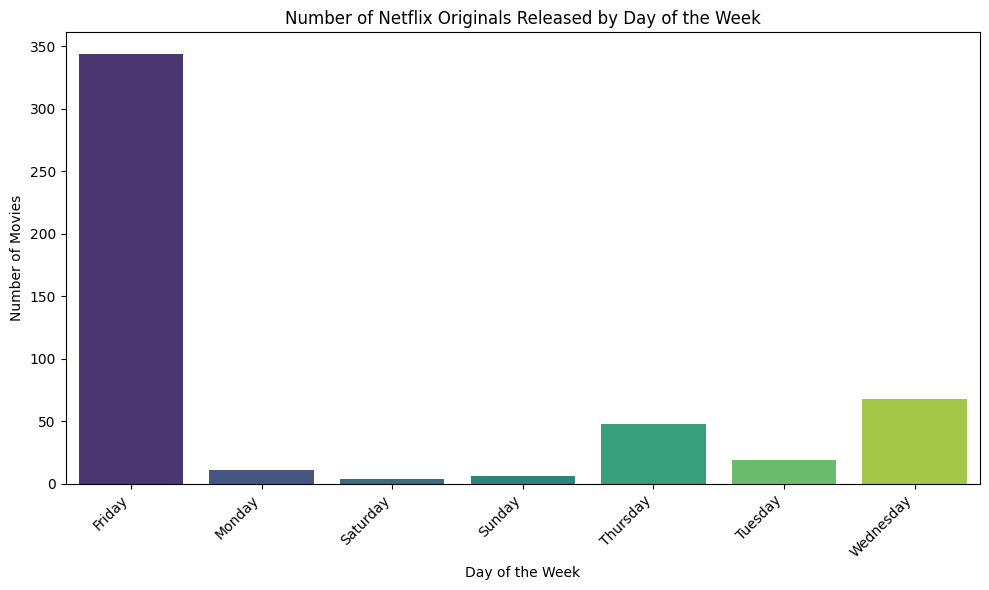

In [ ]:
# Visualize the number of movies released per day of the week
plt.figure(figsize=(10, 6)) # Adjust figure size for readability
sns.barplot(x='Release DayofWeek', y='Count', data=movies_per_day, palette='viridis')
plt.title('Number of Netflix Originals Released by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

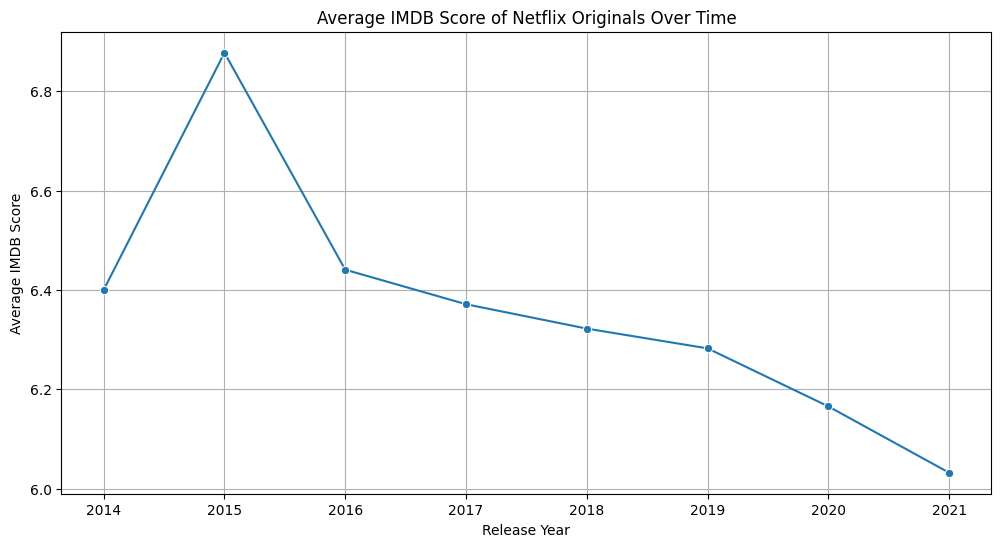

In [65]:
average_imdb_score_per_year = df_copy.groupby('Release Year')['IMDB Score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Release Year', y='IMDB Score', data=average_imdb_score_per_year, marker='o')
plt.title('Average IMDB Score of Netflix Originals Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average IMDB Score')
plt.grid(True)
plt.show()


2015 ma average rating ekdam high xa. Tespaxi rating ma ekdam sharp decline aako xa.

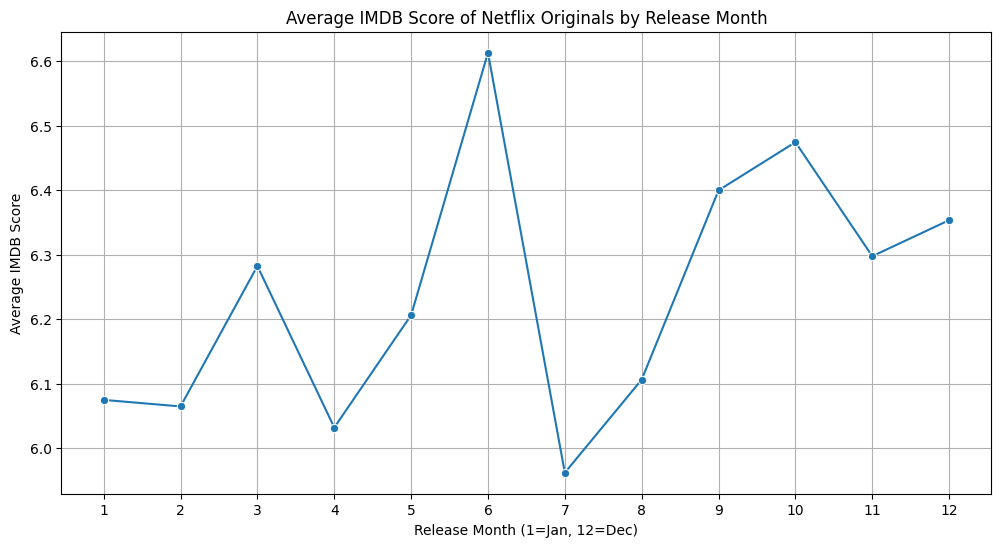

In [67]:
# Group the DataFrame by 'Release Month' and calculate the mean of 'IMDB Score' for each month
average_imdb_score_per_month = df_copy.groupby('Release Month')['IMDB Score'].mean().reset_index()

# Visualize the average IMDB score per month using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release Month', y='IMDB Score', data=average_imdb_score_per_month, marker='o')
plt.title('Average IMDB Score of Netflix Originals by Release Month')
plt.xlabel('Release Month (1=Jan, 12=Dec)')
plt.ylabel('Average IMDB Score')
plt.grid(True)
plt.xticks(range(1, 13)) # Ensure all 12 months are shown on the x-axis
plt.show()

Month wise rating herne ho vane each month ma release vako sabai movies ko average chai 5.9 - 6.6 ko range ma rahexa.
Kun month ma release vako xa vanne kura le khasai asar gardaina rating ma.

In [68]:
import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Calculate the age of the movie in years
df_copy.loc[:,'Movie_Age_Years'] = current_year - df_copy['Release Year']

# Display the DataFrame with the new 'Movie_Age_Years' column
print(df_copy[['Title', 'Premiere', 'Release Year', 'Movie_Age_Years']].head())

                   Title   Premiere  Release Year  Movie_Age_Years
6      Leyla Everlasting 2020-12-04        2020.0              5.0
8                Paradox 2018-03-23        2018.0              7.0
9     Sardar Ka Grandson 2021-05-18        2021.0              4.0
10  Searching for Sheela 2021-04-22        2021.0              4.0
11              The Call 2020-11-27        2020.0              5.0


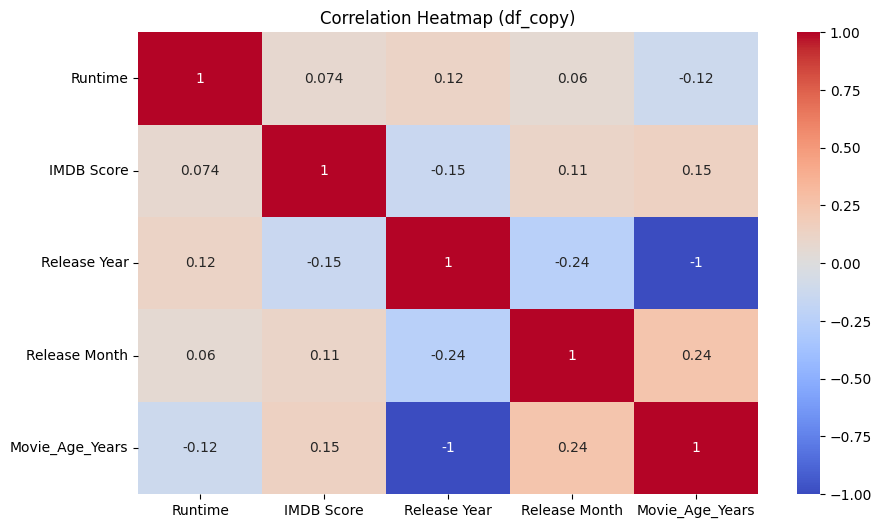

In [70]:
# Recalculate Correlation Matrix for numeric columns including the new 'Movie_Age_Years'
correlation_matrix_copy = df_copy.corr(numeric_only=True)

# Heatmap to visualize correlation with the new column
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_copy, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (df_copy)')
plt.show()


Age badey sangai runtime ghatdai gako trend xa vane score ali baddai gako rahexa average ma.

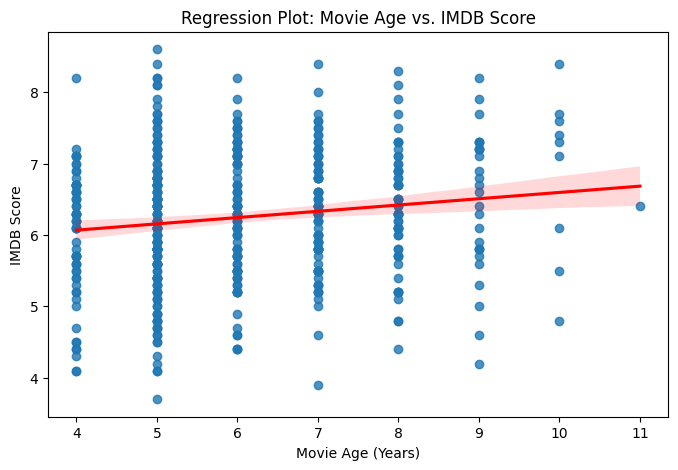

In [71]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Movie_Age_Years', y='IMDB Score', data=df_copy, line_kws={"color": "red"})
plt.title('Regression Plot: Movie Age vs. IMDB Score')
plt.xlabel('Movie Age (Years)')
plt.ylabel('IMDB Score')
plt.show()



Look at the slope of the red line and the spread of the scatter points.
An upward slope
suggests older movies tend to have higher scores.

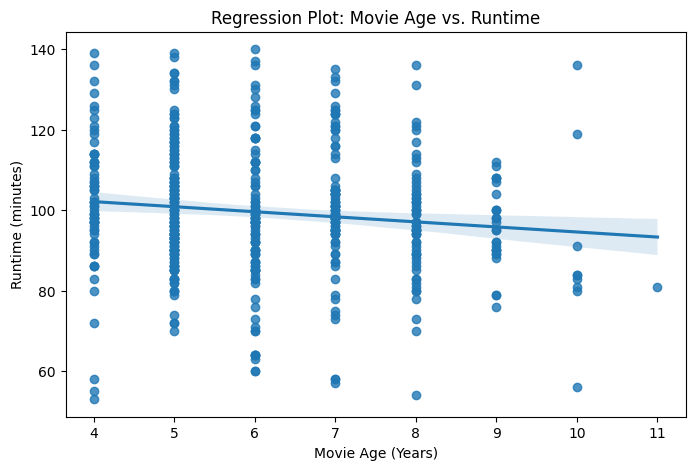

In [72]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Movie_Age_Years', y='Runtime', data=df_copy)
plt.title('Regression Plot: Movie Age vs. Runtime')
plt.xlabel('Movie Age (Years)')
plt.ylabel('Runtime (minutes)')
plt.show()



Mathi vane jastai, naya movies ma runtime ghatdai xa.

#**CONCLUSION**

---
**Data Loading and Initial Exploration:**

---

The dataset NetflixOriginals.csv was loaded.<br>
Initial checks showed numerical and object data types, no missing values, and no duplicates.<br>
A preliminary correlation heatmap indicated a very weak negative correlation between Runtime and IMDB Score.
<br>
---

**Data Cleaning and Preprocessing:**

---

A copy of the data (df_copy) was made.<br>
'Genre' and 'Language' columns were converted to category type for efficiency.<br>
'Premiere' was converted to datetime, and rows that couldn't be converted were dropped.

---

**Data Visualization and Outlier Handling:**

---

Boxplots revealed outliers in 'Runtime' and 'IMDB Score'.<br>
Outliers were removed based on the IQR method.<br>
Boxplots after cleaning showed outliers were handled.<br>
A correlation heatmap of the cleaned data showed a very weak positive correlation between Runtime and IMDB Score.<br>
A regression plot confirmed the weak positive relationship between Runtime and IMDB Score.<br>
The distribution of 'IMDB Score' was left-skewed, while 'Runtime' was nearly normally distributed.<br>
Initial plots of 'Genre' and 'Language' distributions were made.

---

**Feature Engineering and Further Analysis:**

---

Frequent genres (threshold >= 10 movies) were identified and analyzed, showing Documentaries having the highest average IMDB scores among them.<br>
Frequent languages (threshold >= 5 movies) were identified, and analysis showed English and Portuguese had higher max ratings, while some less frequent languages had lower average ratings.<br>
A 'Runtime_Category' (Short, Medium, Long) feature was created, showing most movies are Medium length and longer movies have slightly better ratings.<br>
'Release Year', 'Release Month', and 'Release DayofWeek' features were extracted from 'Premiere'.<br>
Analysis of release patterns showed an increase in releases up to 2020, a sharp decline in 2021, seasonal peaks, and Friday being the most common release day.<br>
Average IMDB scores by year showed a peak in 2015 followed by a sharp decline. Average IMDB scores by month showed little variation.<br>
A 'Movie_Age_Years' feature was calculated.<br>
Correlation analysis including 'Movie_Age_Years' suggested older movies have slightly higher scores and newer movies have shorter runtimes.<br>
Regression plots visualized the relationships between Movie Age and both IMDB Score and Runtime.<br>

---

**Other Insights:**

---

Most movies are medium length, which may not strongly impact ratings.<br>
IMDB scores are slightly higher on average, mostly between 6 and 7.<br>
English is the most common language.<br>
Runtime and Rating outliers were present but handled.<br>
Longer and older movies tend to have slightly better ratings.<br>

---